# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [3]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [4]:
# Your Code Here
print("Shape of training sets: ", x_train.shape, y_train.shape)
print("Shape of testing sets: ", x_test.shape, y_test.shape)
print("Dimension of an image: ", x_train[0].shape)
print("Number of classses: ", len(class_names))
print("Data type: ", x_train.dtype)


Shape of training sets:  (50000, 32, 32, 3) (50000, 1)
Shape of testing sets:  (10000, 32, 32, 3) (10000, 1)
Dimension of an image:  (32, 32, 3)
Number of classses:  100
Data type:  uint8


Some image examples from the training set


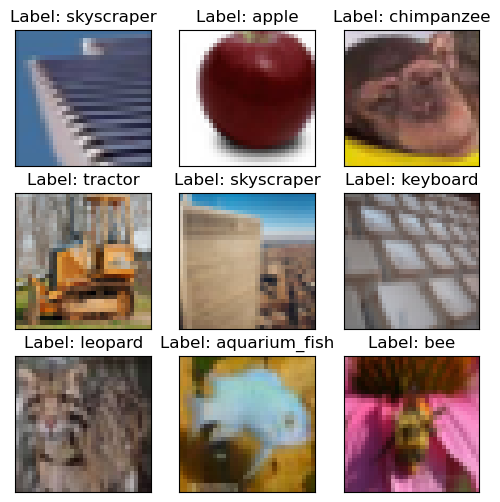

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Selecting 9 random indices from the training set
random_indices = np.random.choice(len(x_train), 9, replace=False)
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {class_names[y_train[random_indices[i]][0]]}")
    ax.set_xticks([])
    ax.set_yticks([])

print("Some image examples from the training set")
plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
# Your Code Here
# Normalize pixel values to the range [0,1]
x_train_n = x_train.astype("float32") / 255.0
x_test_n = x_test.astype("float32") / 255.0

### Print the range of pixel values after normalization
print("Min pixel value:", x_train_n.min())
print("Max pixel value:", x_train_n.max())

Min pixel value: 0.0
Max pixel value: 1.0


In [7]:
from tensorflow.keras.utils import to_categorical

# Convert the labels to one-hot encoding
y_train_n = to_categorical(y_train, num_classes=100)
y_test_n = to_categorical(y_test, num_classes=100)

In [8]:
y_train_n[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split

# Split the training set into training and validation sets
x_train_s, x_val, y_train_s, y_val = train_test_split(
    x_train_n,
    y_train_n,
    test_size=0.2,
    random_state=42,
    stratify=y_train_n
)

# Print dataset shapes after splitting
print("Training set shape:", x_train_s.shape, y_train_s.shape)
print("Validation set shape:", x_val.shape, y_val.shape)

Training set shape: (40000, 32, 32, 3) (40000, 100)
Validation set shape: (10000, 32, 32, 3) (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [10]:
# Your Code Here
from tensorflow.keras import layers, models

# Create a CNN model
model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    # Convolutional layer 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Flatten and Fully Connected Layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    #
    #layers.Dense(100, activation='relu')
    layers.Dense(100, activation='softmax')
])

# Print Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [11]:
# Your Code Here
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
 #   metrics=['accuracy',Precision(), Recall()]
    metrics=['accuracy',Precision()]
)


> 'categorical_crossentropy' loss function works well with one-hot encoded labels.

> Adam optimizer mainly works well and dynamically adjusts learning rate.

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [12]:
# Your Code Here

history = model.fit(
    x_train_s,
    y_train_s,
    #epochs=10,
    epochs=10,
    batch_size=32,
    #batch_size=16,
    validation_data = (x_val, y_val) # use validation data as validation set
)


Epoch 1/10
1250/1250 [==============================] - 25s 19ms/step - loss: 4.0493 - accuracy: 0.0806 - precision: 0.5813 - val_loss: 3.6271 - val_accuracy: 0.1419 - val_precision: 0.5633
Epoch 2/10
1250/1250 [==============================] - 19s 15ms/step - loss: 3.4092 - accuracy: 0.1803 - precision: 0.6407 - val_loss: 3.2388 - val_accuracy: 0.2151 - val_precision: 0.6701
Epoch 3/10
1250/1250 [==============================] - 21s 17ms/step - loss: 3.1045 - accuracy: 0.2354 - precision: 0.6935 - val_loss: 3.0773 - val_accuracy: 0.2463 - val_precision: 0.6663
Epoch 4/10
1250/1250 [==============================] - 20s 16ms/step - loss: 2.9172 - accuracy: 0.2728 - precision: 0.7070 - val_loss: 2.9380 - val_accuracy: 0.2679 - val_precision: 0.7095
Epoch 5/10
1250/1250 [==============================] - 32s 26ms/step - loss: 2.7844 - accuracy: 0.2992 - precision: 0.7161 - val_loss: 2.8791 - val_accuracy: 0.2823 - val_precision: 0.6656
Epoch 6/10
1250/1250 [============================

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [14]:
# Your Code Here
# Evaluate the model on the test dataset
#loss, accuracy, precision, recall = model.evaluate(x_val, y_val)
loss, accuracy, precision = model.evaluate(x_val, y_val)

# Print the accuracy
print(f"Test Loss: ", loss)
print(f"Test Accuracy: ", accuracy)
print(f"Test Precision: ", precision)
#print(f"Test Recall: ", recall)



313/313 [==============================] - 1s 3ms/step - loss: 2.7188 - accuracy: 0.3254 - precision: 0.6501
Test Loss:  2.7187695503234863
Test Accuracy:  0.3253999948501587
Test Precision:  0.6500903964042664


> The accuracy value is pretty low now.

> The precision value is low.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

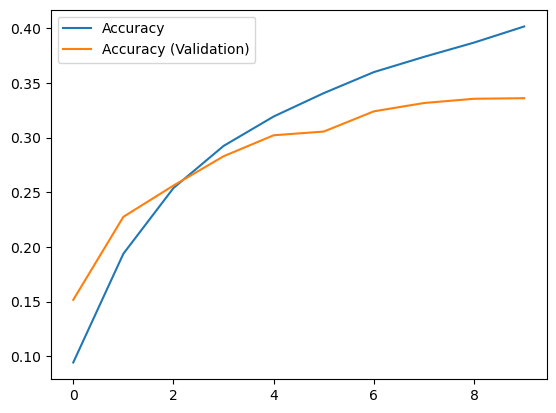

In [18]:
# Your Code Here
#model.history()
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Accuracy (Validation)")
plt.legend();
plt.show()


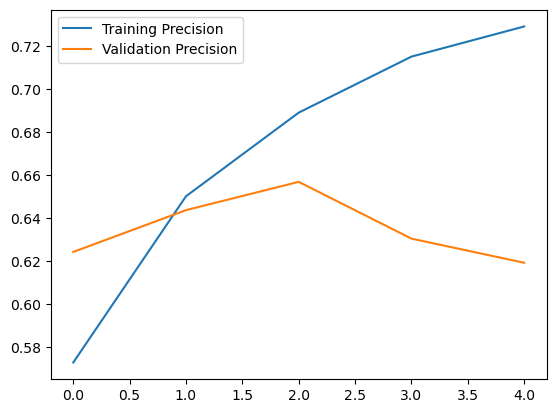

In [18]:
plt.plot(history.history['precision'], label="Training Precision")
plt.plot(history.history['val_precision'], label="Validation Precision")
plt.legend();
plt.show()

In [19]:
y_true_classes = np.argmax(y_test, axis=1)
y_val.shape


(10000, 100)

In [20]:
y_true_classes = np.argmax(y_test, axis=1)
y_true_classes.shape

(10000,)

In [16]:
# Get model predictions (probabilities)
y_pred_probs = model.predict(x_val)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Get predicted labels
y_true_classes = np.argmax(y_val, axis=1)

# Find correctly and incorrectly classified images
correct_indices = np.where(y_pred_classes == y_true_classes)[0]  # Correct predictions
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]  # Incorrect predictions


313/313 [==============================] - 1s 3ms/step


313/313 [==============================] - 1s 3ms/step


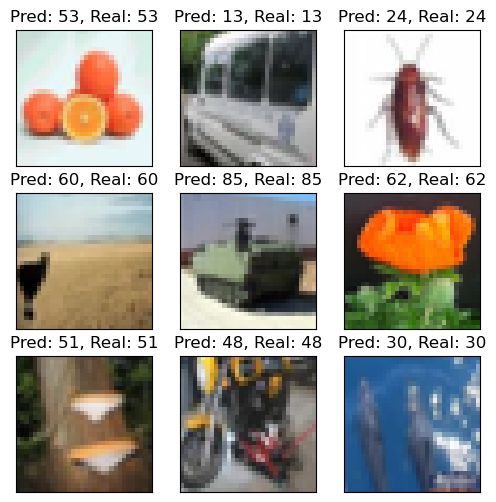

In [24]:
# Correctly classified images

# Get the predictions for the test data
predictions = model.predict(x_val)

# Get the index of the largest probability (i.e. the predicted class)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_val, axis=1)

classified_indices = np.where(predicted_classes == true_classes)[0]

# Get the misclassified samples themselves
classified_samples = x_val[classified_indices]
classified_labels = np.argmax(y_val[classified_indices], axis=1)

# Pick 9 random misclassified samples
random_indices = np.random.choice(len(classified_indices), 9, replace=False)

fig, axes = plt.subplots(
    3, 
    3, 
    figsize=(6, 6)
)
for i, ax in enumerate(axes.flat):
    ax.imshow(
    #    misclassified_samples[random_indices[i]].reshape(8, 8), 
        classified_samples[random_indices[i]], 
        cmap=plt.cm.gray_r, 
        interpolation='nearest'
    )
    ax.set_title(f"Pred: {predicted_classes[classified_indices[random_indices[i]]]}, Real: {classified_labels[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

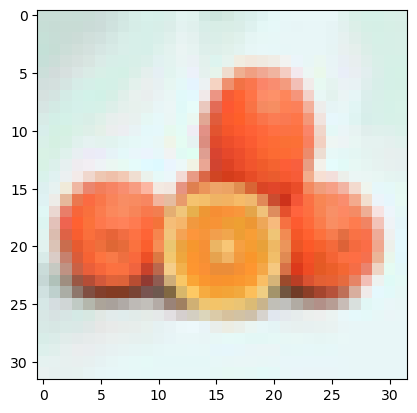

In [25]:
plt.imshow(classified_samples[random_indices[0]])

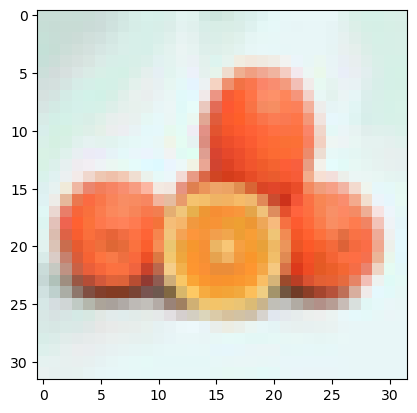

In [26]:
plt.imshow(classified_samples[random_indices[0]])

In [28]:
class_names[classified_labels[random_indices[0]]]

'orange'

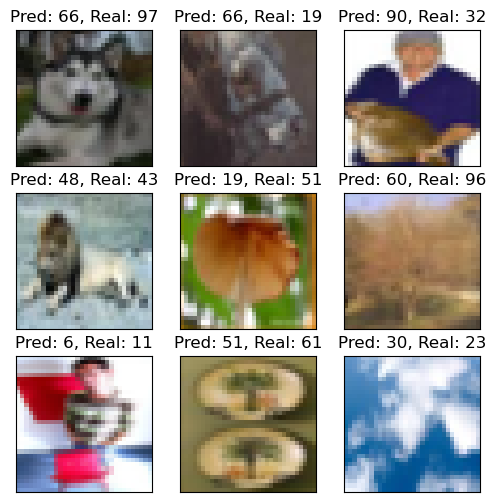

In [29]:
# Incorrectly classified images

misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Get the misclassified samples themselves
misclassified_samples = x_val[misclassified_indices]
misclassified_labels = np.argmax(y_val[misclassified_indices], axis=1)

# Pick 9 random misclassified samples
random_indices = np.random.choice(len(misclassified_indices), 9, replace=False)

fig, axes = plt.subplots(
    3, 
    3, 
    figsize=(6, 6)
)
for i, ax in enumerate(axes.flat):
    ax.imshow(
    #    misclassified_samples[random_indices[i]].reshape(8, 8), 
        misclassified_samples[random_indices[i]], 
        cmap=plt.cm.gray_r, 
        interpolation='nearest'
    )
    ax.set_title(f"Pred: {predicted_classes[misclassified_indices[random_indices[i]]]}, Real: {misclassified_labels[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [15]:
# Your Code Here
model_4a = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Dropout 1
    layers.Dropout(0.25 ), 
    

    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dropout 2
    layers.Dropout(0.25), # 25% dropout rate to get more from the model

    # Flatten and Fully Connected Layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # Optional Dropout before final layer
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(100, activation='softmax')
])

model_4a.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

> I added two dropouts to help reduce overfitting by randomly disabling a fraction of neurons during training, pushing the network to learn more features.

In [17]:
model_4a.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    #metrics=['accuracy',Precision()]
    metrics=['accuracy']
)

In [18]:
history_4a = model_4a.fit(
    x_train_s,
    y_train_s,
    #epochs=10,
    epochs=10,
    batch_size=32,
    #batch_size=16,
    validation_data = (x_val, y_val) # use validation data as validation set
)

Epoch 1/10
1250/1250 [==============================] - 20s 15ms/step - loss: 4.3449 - accuracy: 0.0375 - val_loss: 3.9398 - val_accuracy: 0.1099
Epoch 2/10
1250/1250 [==============================] - 20s 16ms/step - loss: 3.9253 - accuracy: 0.0903 - val_loss: 3.6780 - val_accuracy: 0.1530
Epoch 3/10
1250/1250 [==============================] - 21s 17ms/step - loss: 3.7570 - accuracy: 0.1156 - val_loss: 3.4497 - val_accuracy: 0.1921
Epoch 4/10
1250/1250 [==============================] - 22s 17ms/step - loss: 3.6576 - accuracy: 0.1303 - val_loss: 3.3637 - val_accuracy: 0.2077
Epoch 5/10
1250/1250 [==============================] - 22s 17ms/step - loss: 3.5670 - accuracy: 0.1458 - val_loss: 3.2621 - val_accuracy: 0.2270
Epoch 6/10
1250/1250 [==============================] - 17s 13ms/step - loss: 3.5063 - accuracy: 0.1584 - val_loss: 3.1877 - val_accuracy: 0.2389
Epoch 7/10
1250/1250 [==============================] - 13s 11ms/step - loss: 3.4605 - accuracy: 0.1618 - val_loss: 3.1151 -

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

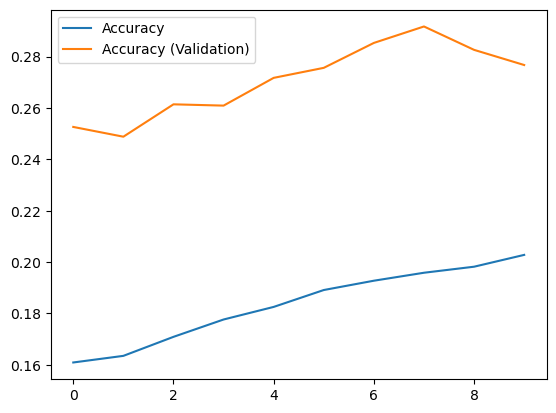

In [39]:
# Your Code Here
plt.plot(history_4a.history['accuracy'], label="Accuracy")
plt.plot(history_4a.history['val_accuracy'], label="Accuracy (Validation)")
plt.legend();
plt.show()


> The new model didn't impreove the accuracy :(

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

> No, the new model didn't improve the accuracy.

> I tieThe dropout didn't help because the data was not clear enoght in the first place 

> 

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.